<a href="https://colab.research.google.com/github/AruntejaLonka/Airbnb-EDA-Capestone-Project/blob/main/Copy_of_Airbnb_Bookings_Analysis(2022)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##"I don't guess. I observe and once I've observed, I deduce."

~ A Sherlock Holmes quote from the tv series 'Elementary' ~



Sherlock Holmes - the famous fictional detective created by British author Sir Arthur Conan Doyle is known for his proficiency with observation, deduction, forensic science, and logical reasoning that borders on the fantastic, which he employs when investigating cases for a wide variety of clients.

This quote itself explains why Holmes is a great detective. Merely guessing from a dataset without observing, cleaning and analysing will lead you to twist facts to suit your own superficial and biased theories. Which is actually what no one is expecting from an analyst, but an eagle eye that drives after its prey.

The process of diving into your given information would rather seem cumbersome, but it's something that is unavoidable and time consuming. So without further due, let's embark on a journey to deduce the key understandings of the Airbnb business model.

# 1.Setting the Stage

---



In [ ]:
#Load the goodies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Mount the tank
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Supply the energy
airbnb_df = pd.read_excel('/content/AirbnbNYC2019-210324-121446.xlsx')

# 2.Exploring the waters

---



In [ ]:
#Take the first look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Identify different charachteristics of the fuel
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48869 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48873 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#Identify the size
airbnb_df.shape

(48895, 16)

In [ ]:

#Check the Statistical discription of numerical value in dataset
#Crunch the numbers   
airbnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


## Looking for the lost souls


* Why look for the null values?  - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

* Few doubts that pop up in our analytical minds are...

 * How ubiquitous are the missing values?
 * Are they random?
 * Do they show a pattern?








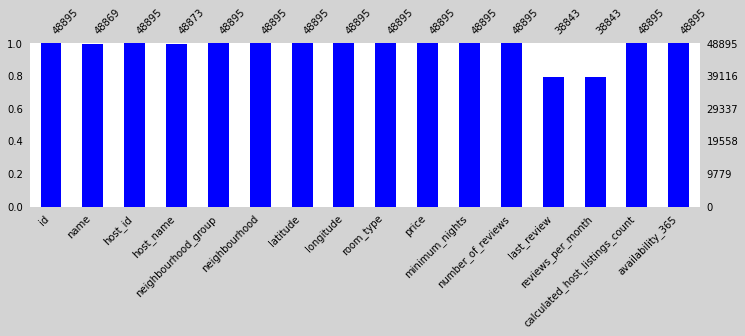

In [ ]:
#Visualize the missing values
plt.figure(facecolor='lightgray')
msno.bar(airbnb_df,color='blue',figsize=[12,3],fontsize=10)
plt.show()

Visible as they are even in the dark! These graphs are insanely handy when hunting for these lost souls, as they provide a clear overall picture of their whereabouts and sizes.

Apparantely, only two of them 'last_review' and 'reviews_per_month' are considerably missing, while values of 'name' and host_name' are negligible. Hence, this set of information is clean to a greater extent and these missing values could be replaced with a '0' or the particular corresponding variable could be removed completely if more than 50% of the data are null values as a rule of thumb in order to make sure they won't affect our future analysis.

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [ ]:
#Dig into the count and percentages
tot_missing = airbnb_df.isnull().sum().sort_values(ascending=False)
percent_missing = (airbnb_df.isnull().sum()* 100 / len(airbnb_df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
name,26,0.05
host_name,22,0.04
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


[Text(0, 0, 'last_review'),
 Text(0, 0, 'reviews_per_month'),
 Text(0, 0, 'name'),
 Text(0, 0, 'host_name'),
 Text(0, 0, 'id'),
 Text(0, 0, 'host_id'),
 Text(0, 0, 'neighbourhood_group'),
 Text(0, 0, 'neighbourhood'),
 Text(0, 0, 'latitude'),
 Text(0, 0, 'longitude'),
 Text(0, 0, 'room_type'),
 Text(0, 0, 'price'),
 Text(0, 0, 'minimum_nights'),
 Text(0, 0, 'number_of_reviews'),
 Text(0, 0, 'calculated_host_listings_count'),
 Text(0, 0, 'availability_365')]

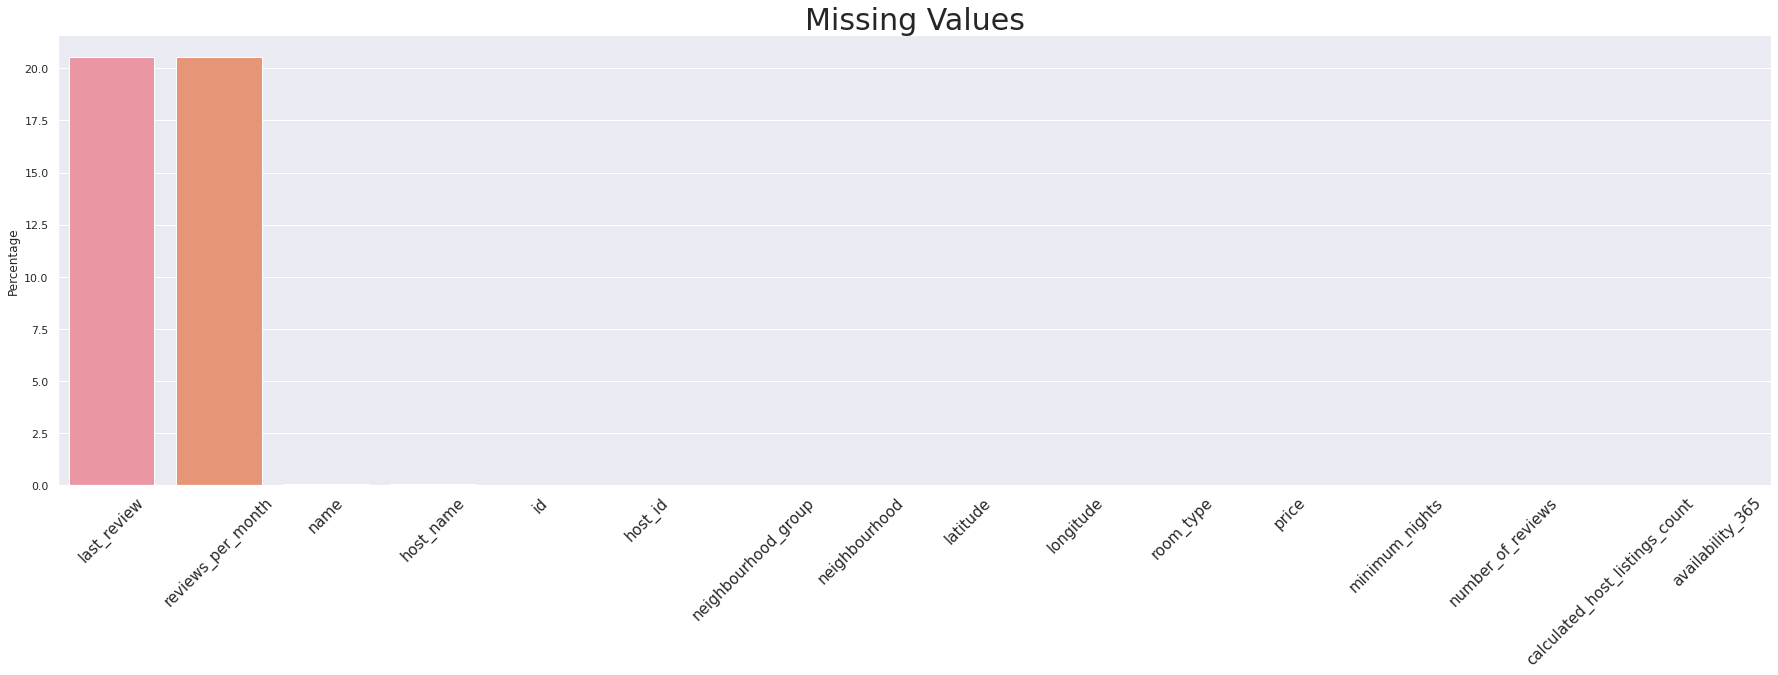

In [ ]:
#Visualize the numbers
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30.7,8.27)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 30)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize = 15, rotation=45)

Mmmmm...magnificent! This reveals columns "last_review" and "review_per_month" only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

# 3.First Move - Getting rid of the misfits!



---



## Why remove them? 
Columns "id", "host_name" and "last_review" are irrelevant and insignificant to our data analysis since they will not provide crucial insights to our questions. Hence, we shall take our first move by removing them...

In [ ]:
#Kick out the misfits
airbnb_df.drop(['id','last_review','reviews_per_month'], axis=1, inplace=True)

In [ ]:
#A quick look at the new results
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy! 

But, One more step to go...

## Bringing in the most wanted!

In [ ]:
list(airbnb_df.columns)

['name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48869 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48873 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Finally, we got rid of the noisiness in our dataset and it's ready for further advanced exploration. Ahoy! Let's venture into the unexplored territories! 

# Map of Neighbourhood group

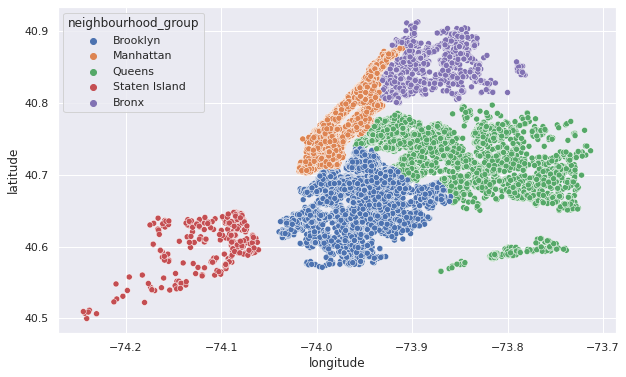

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group)
plt.ioff()

In [ ]:
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

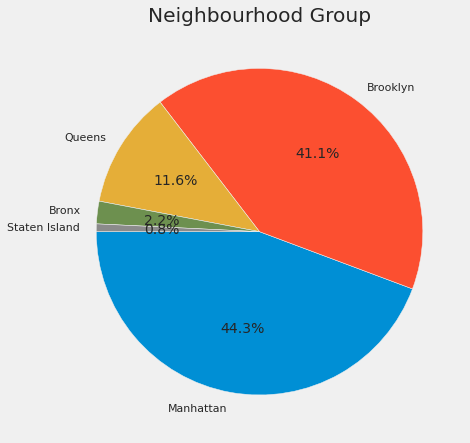

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

## The pie chart above shows that Airbnb Listings in Newyork are near Manhattan(44.3%), and Brooklyn(41.1%) has the highest share of hotels. We also know that from this map of Neighborhood Group.


# Availability of Room

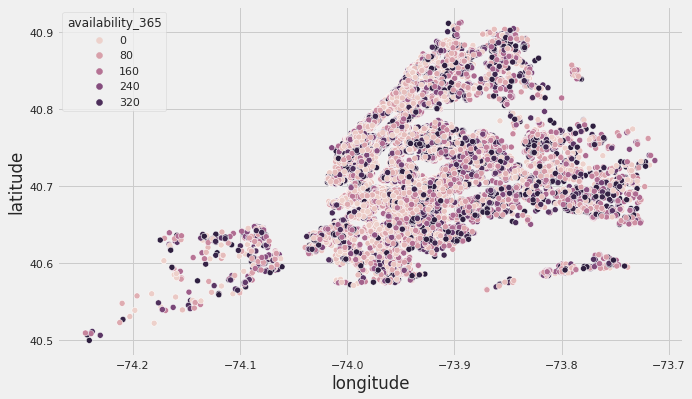

In [ ]:


plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.availability_365)
plt.ioff()

# — Room Details
Let’s see the type of room.


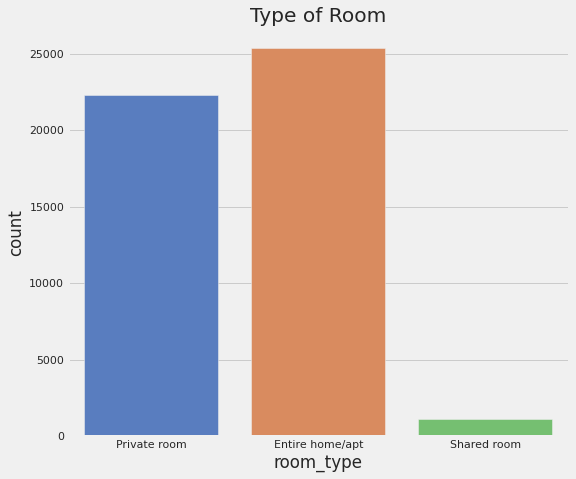

In [ ]:
plt.figure(figsize=(8,7))
plt.title("Type of Room")
sns.countplot(airbnb_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()


### We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.

# Let’s see room types occupied by a neighborhood group.

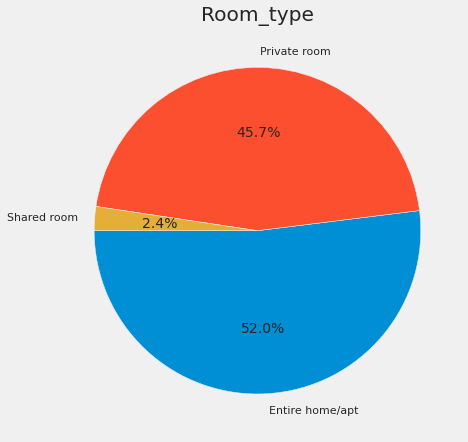

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Room_type")
g = plt.pie(airbnb_df.room_type.value_counts(), labels=airbnb_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

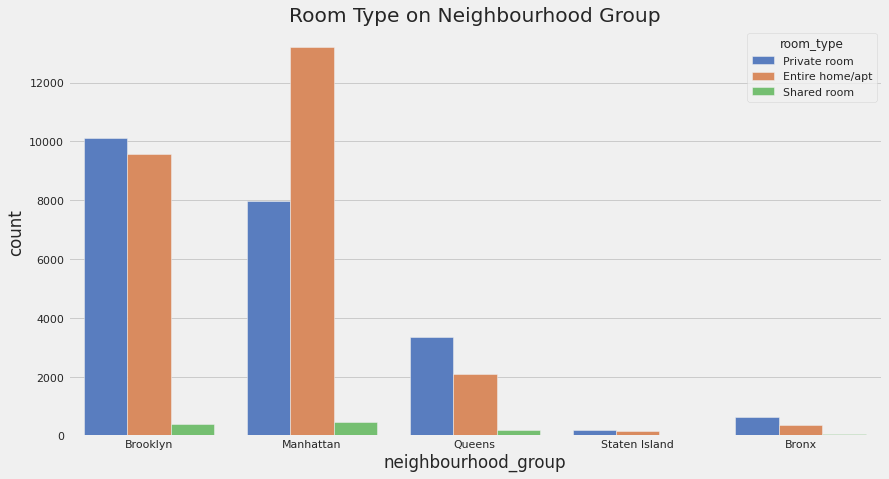

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type, palette="muted")
plt.show()

The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

# — Neighbourhood Group vs. Availability Room

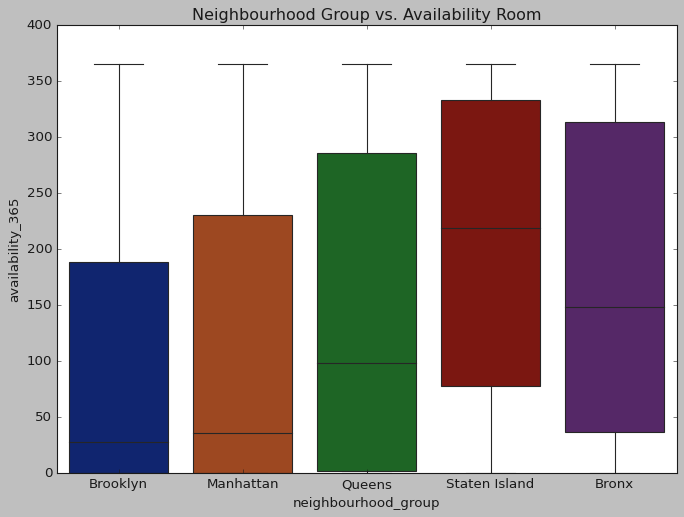

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

The graph above shows the relationship between the availability room and neighborhood group.

## — Neighbourhood Group Price Distribution

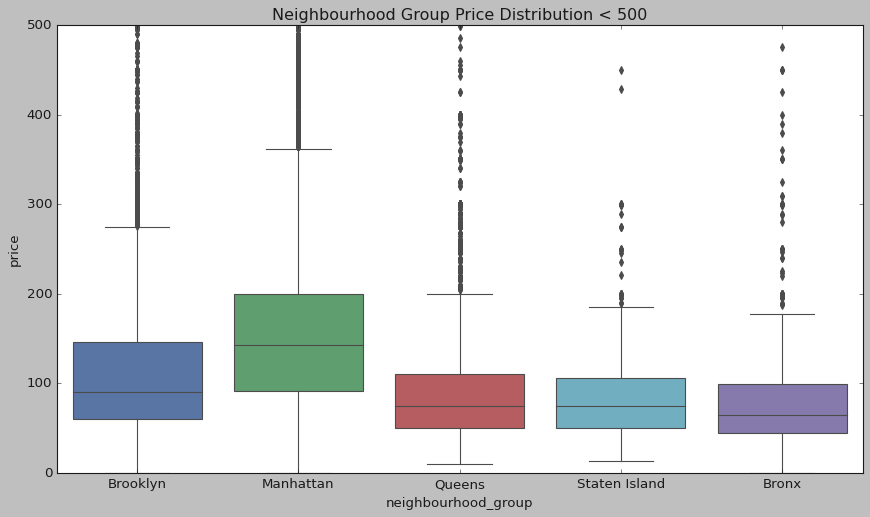

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = airbnb_df[airbnb_df.price<500])
plt.show()


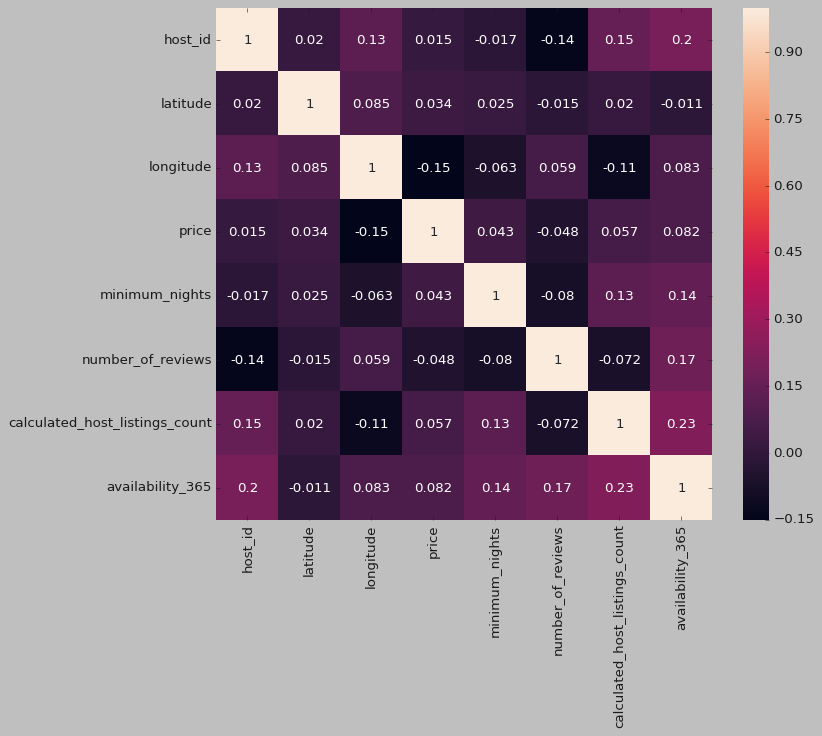

In [ ]:
corr = airbnb_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

# 4.What can we learn about different hosts and areas?

In [ ]:

hosts_and_areas= airbnb_df.groupby(['host_name','neighbourhood_group'])["calculated_host_listings_count"].count().reset_index()


In [ ]:
haa= hosts_and_areas.sort_values('calculated_host_listings_count',ascending=False).head(10)

In [ ]:
haa

,host_name,neighbourhood_group,calculated_host_listings_count
13216,Sonder (NYC),Manhattan,327
1833,Blueground,Manhattan,230
9741,Michael,Manhattan,212
3249,David,Manhattan,202
9740,Michael,Brooklyn,159
6807,John,Manhattan,151
3248,David,Brooklyn,142
7274,Kara,Manhattan,135
9855,Mike,Manhattan,134
431,Alex,Manhattan,134


Text(0.5, 1.0, 'Hosts and Host listings Count')

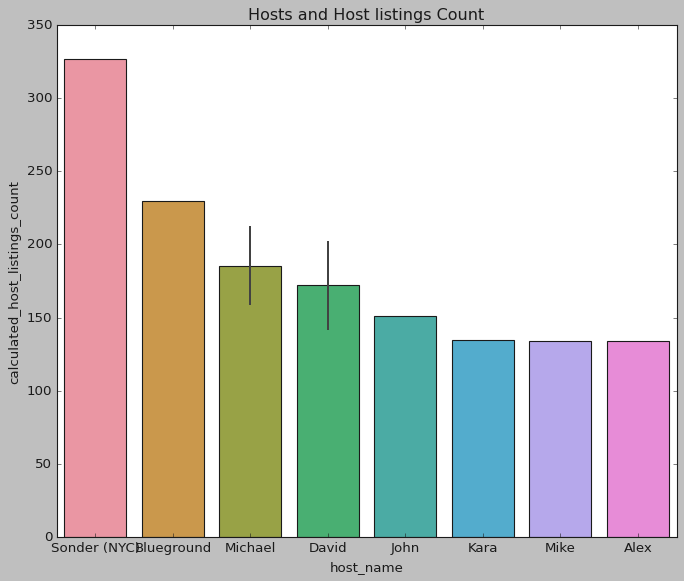

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x= haa['host_name'],y=haa['calculated_host_listings_count'])
plt.title('Hosts and Host listings Count')

##Here are some intersting findings,we found fascinating:
## 8 out of top 10 hosts are from the ''Manhattan'' neighbourhood group.
## 2 out of top 10 hosts are from the ''Brooklyn" neighbourhood group.
## [ Sonder (NYC), Blueground, Michael, David, John, Kara, Alex, Mike] are the top hosts of Manhattan neighbourhood group.
## [ Michael,David] are the top hosts in Brooklyn neighbourhood group.
## Manhattan neighbourhood group hosts are out-performing in listings.

In [ ]:

hosts_and_turnover= airbnb_df.groupby(['host_name','neighbourhood_group'])["price"].sum().reset_index()
haa_turnover= hosts_and_turnover.sort_values('price',ascending=False).head(10)

In [ ]:
haa_turnover

,host_name,neighbourhood_group,price
13216,Sonder (NYC),Manhattan,82795
1833,Blueground,Manhattan,69741
9741,Michael,Manhattan,42093
3249,David,Manhattan,40366
7274,Kara,Manhattan,35828
11725,Red Awning,Manhattan,35294
431,Alex,Manhattan,30976
12356,Sally,Manhattan,30803
7627,Kevin,Manhattan,29703
6581,Jessica,Brooklyn,26230


# 5) What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
loc_price= airbnb_df.groupby(['name','neighbourhood_group','neighbourhood','price','minimum_nights'])['number_of_reviews'].count().reset_index()

top_prices= loc_price.sort_values('price',ascending=False).head(5)

In [ ]:
top_prices

,name,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews
27218,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,10000,5,1
20212,Furnished room in Astoria apartment,Queens,Astoria,10000,100,1
1105,1-BR Lincoln Center,Manhattan,Upper West Side,10000,30,1
41043,Spanish Harlem Apt,Manhattan,East Harlem,9999,5,1
36149,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,9999,99,1


Text(0.5, 1.0, 'Max Prices in different neighbourhood ')

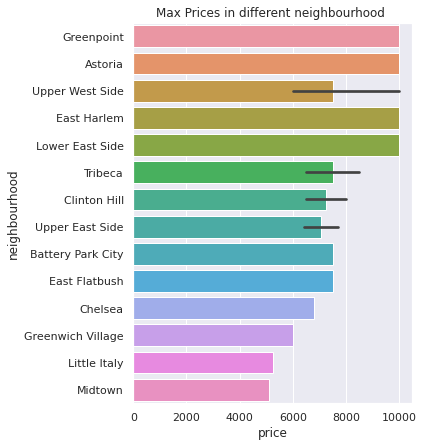

In [ ]:
 #Max prices in different neighbourhood
plt.figure(figsize=(5,7))
sns.barplot(x= top_prices['price'],y=top_prices['neighbourhood'])
plt.title('Max Prices in different neighbourhood ')

Text(0.5, 1.0, 'minimum_nights in different neighbourhood ')

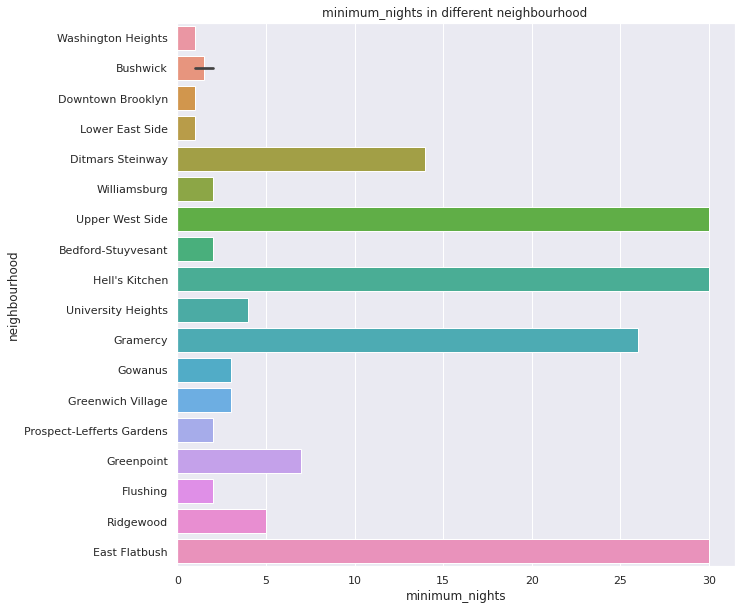

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x= l1['minimum_nights'],y=l1['neighbourhood'])
plt.title('minimum_nights in different neighbourhood ')

# Price Vs Location analysis shown some interesting facts:

'''The highest price is 10,000 usd and can be seen in Astoria, Upper west side, lower east side, Greenpoint and East Harlem.
most minimum nights spent in top 20 price list are,
- Luxury TriBeCa Apartment at an amazing price - 180 nights
- Furnished room in Astoria apartment - 100 nights
- Quiet, Clean, Lit @ LES & Chinatown - 99 nights
- highest priced rooms (i.e., 10,000usd) are present in Manhattan, Brooklyn and Queens neighbourhood group'''


In [ ]:
areas_reviews = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


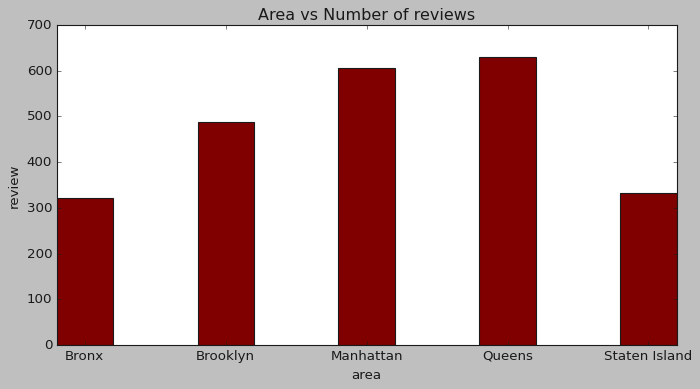

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = airbnb_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


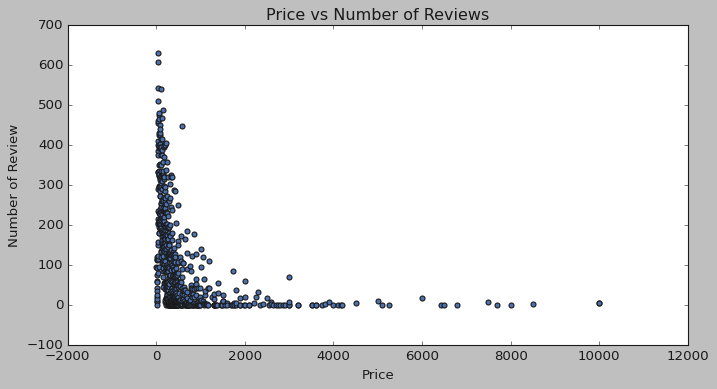

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

From the above Analysis we can say that most people prefer to stay in place where price is less.



# 6) Which hosts are the busiest and why?

In [ ]:
busiest_hosts = airbnb_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10278,Dona,47621202,Private room,629
17707,Jj,4734398,Private room,607
25565,Maya,37312959,Private room,543
6234,Carol,2369681,Private room,540
8946,Danielle,26432133,Private room,510
3949,Asa,12949460,Entire home/apt,488
37747,Wanda,792159,Private room,480
22498,Linda,2680820,Private room,474
8624,Dani,42273,Entire home/apt,467
2941,Angela,23591164,Private room,466


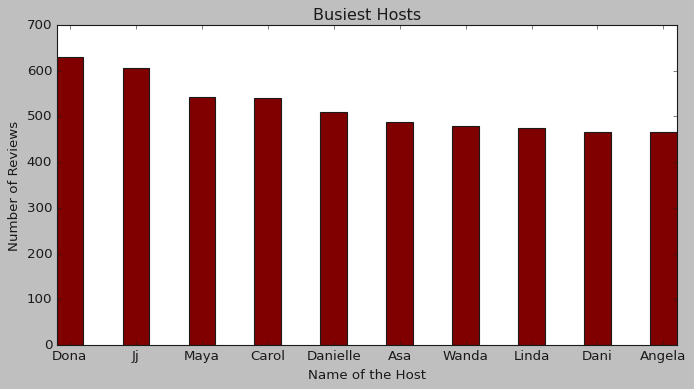

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

##Busiest hosts are: 
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

##Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.


In [ ]:
##busiest_hosts= airbnb_df.groupby(['host_name','neighbourhood_group','room_type'])["minimum_nights"].count().reset_index()

#busy_host= busiest_hosts.sort_values('minimum_nights', ascending=False).head()

Text(0.5, 1.0, 'Top 5 busiest hosts')

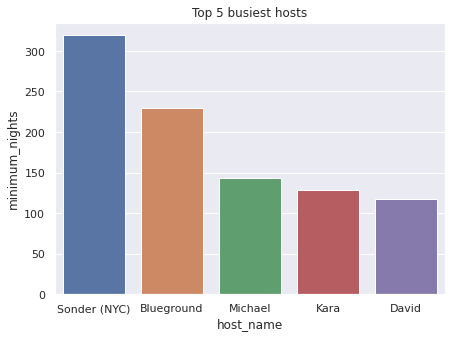

In [ ]:
#

In [ ]:
list(airbnb_df['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

# 7) Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:

traffic_areas= airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traf_area=traffic_areas.sort_values('minimum_nights',ascending=False).head(20)

In [ ]:
traf_area

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


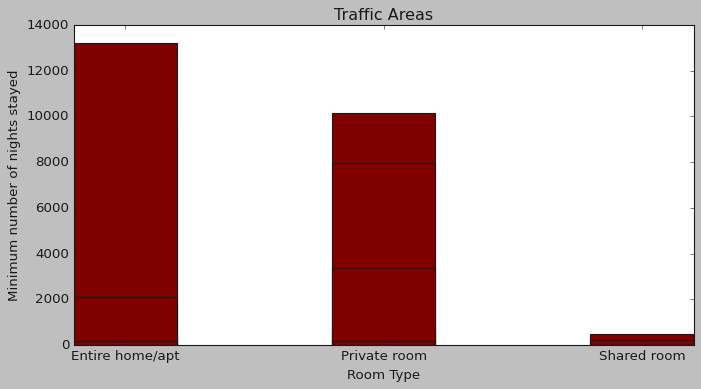

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

### *By the above analysis:*
### 1) In Manhattan, people are preferring "Entire Home/apt".
### 2) But, in Brooklyn, Queens and Bronx people are preferring private rooms.
### 3) In staten island, people are having equal preference over all three types of rooms.

From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

##Conclusion:
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
###3. Most people prefer to pay less price.
###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
###5. If people are not staying more then one night means they are travellers.

Airbnb dataset-2019 appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. From the entire analysis on airbnb bookings analysis,Our assumptions before analysis went totally different after getting results from the analysis. The whole EDA process gave very fascinating results and insights that will be helpful for business development and expansion, budget allocations and focussing on things people prefer.*italicized text*